# Resumen
Este proyecto de ciencia de datos tiene como objetivo analizar un conjunto de datos de jugadores de fútbol para predecir su valor de mercado actual y su rendimiento futuro. Utilizando técnicas de análisis y modelado de datos, se pretende ayudar a los clubes de fútbol a tomar decisiones informadas sobre la adquisición y desarrollo de talento. Los hallazgos clave incluyen la identificación de las características más influyentes en el valor de mercado y el rendimiento de los jugadores, así como la evaluación de modelos predictivos que ofrecen una precisión razonable en estas tareas.

# Objetivo General

El objetivo general de este proyecto es predecir el valor actual de mercado de los jugadores de fútbol y su rendimiento futuro para ayudar a un club de fútbol, en la toma de decisiones estratégicas sobre la adquisición y desarrollo de jugadores.

## Objetivos Especificos:


1.   Desarrollar un modelo para predecir el valor actual de mercado de un jugador basado en sus características y rendimiento histórico.
2.   Crear modelos para predecir el rendimiento futuro de los jugadores en términos de goles, asistencias y minutos jugados.
3.   Evaluar la importancia de diferentes características (goles, asistencias, minutos jugados, etc.) en la determinación del valor de mercado de los jugadores.



# Contexto Comercial

Imaginemos que trabajamos para un club de fútbol profesional, "Futbol Club Excelencia", que busca maximizar el rendimiento de su equipo y optimizar sus inversiones en jugadores. El club desea implementar un sistema basado en ciencia de datos que les permita evaluar el valor actual de sus jugadores y predecir su rendimiento futuro. Con esta información, el club podrá tomar decisiones más informadas en cuanto a la compra y venta de jugadores, y en la planificación de estrategias de formación y desarrollo.

# Hipotesis
Hipótesis sobre el Valor del Jugador: Se supone que características como el número de apariciones, goles, asistencias, y la posición del jugador tienen una relación significativa con su valor de mercado actual.

Hipótesis sobre el Rendimiento Futuro: Se espera que el rendimiento futuro de un jugador (medido en términos de goles, asistencias y minutos jugados) pueda ser predicho razonablemente a partir de sus datos históricos y características demográficas.

# Procedimiento

1.-**Recolección de Datos:** Obtención de un dataset detallado con estadísticas y características de los jugadores.

2.-**Preprocesamiento de Datos:** Limpieza y transformación de los datos, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.

3.-**Análisis Exploratorio de Datos (EDA):** Visualización y análisis estadístico para comprender mejor las relaciones entre las variables.

4.-**Entrenamiento del Modelo:** Implementación y ajuste de modelos de regresión para predecir el valor actual de los jugadores y su rendimiento futuro.

5.-**Evaluación del Modelo:** Medición del rendimiento de los modelos utilizando métricas como RMSE y MAE.

6.-**Interpretación de Resultados:** Análisis de la importancia de las características y los factores que más influyen en las predicciones.

# Implementación del Modelo
**Paso 1: Preparación de los Datos**

Preprocesamos los datos eliminando columnas irrelevantes, codificando variables categóricas y normalizando variables numéricas.

**Paso 2: Análisis Exploratorio de Datos (EDA)**

Realizamos un análisis exploratorio para visualizar las distribuciones de las características y las relaciones entre las variables.

**Paso 3: Entrenamiento del Modelo**

Dividimos los datos en conjuntos de entrenamiento y prueba, y entrenamos un modelo de regresión (Random Forest Regressor) para predecir el valor actual de los jugadores.

**Paso 4: Evaluación del Modelo**

Evaluamos el modelo utilizando métricas como el RMSE.

**Paso 5: Predicción del Rendimiento Futuro**

Desarrollamos y entrenamos modelos adicionales para predecir métricas de rendimiento futuro como goles, asistencias y minutos jugados.

In [10]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Cargamos el dataset
data = pd.read_csv('Prediccion_jugadores_soccer.csv')

# Análisis Exploratorio de Datos (EDA)
El análisis exploratorio de datos (EDA) es crucial para entender la calidad de los datos y obtener insights iniciales. Vamos a realizar el análisis EDA:

In [12]:
# Ver las primeras filas del dataset
print(data.head())

                                     player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000 

In [13]:
# Descripción estadística de las variables numéricas
print(data.describe())

             height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.44

In [14]:
# Verificar valores nulos
print(data.isnull().sum())

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64


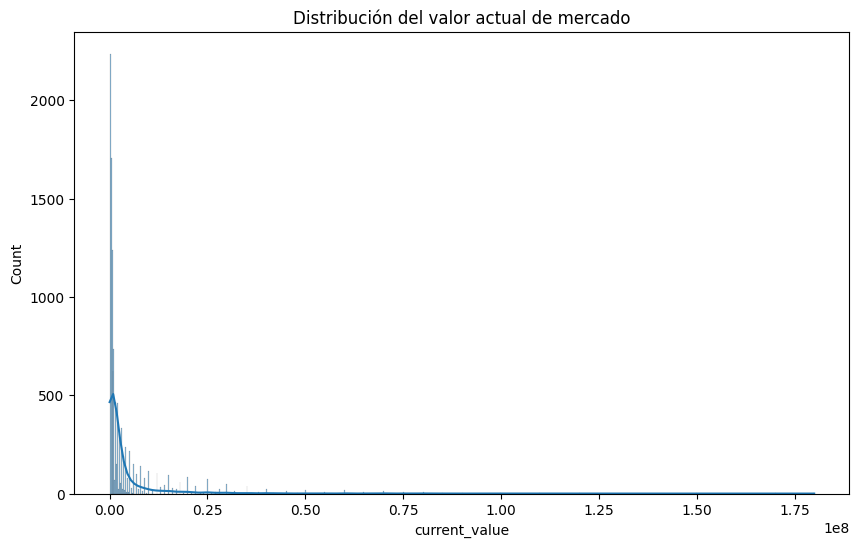

In [15]:
# Distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(data['current_value'], kde=True)
plt.title('Distribución del valor actual de mercado')
plt.show()

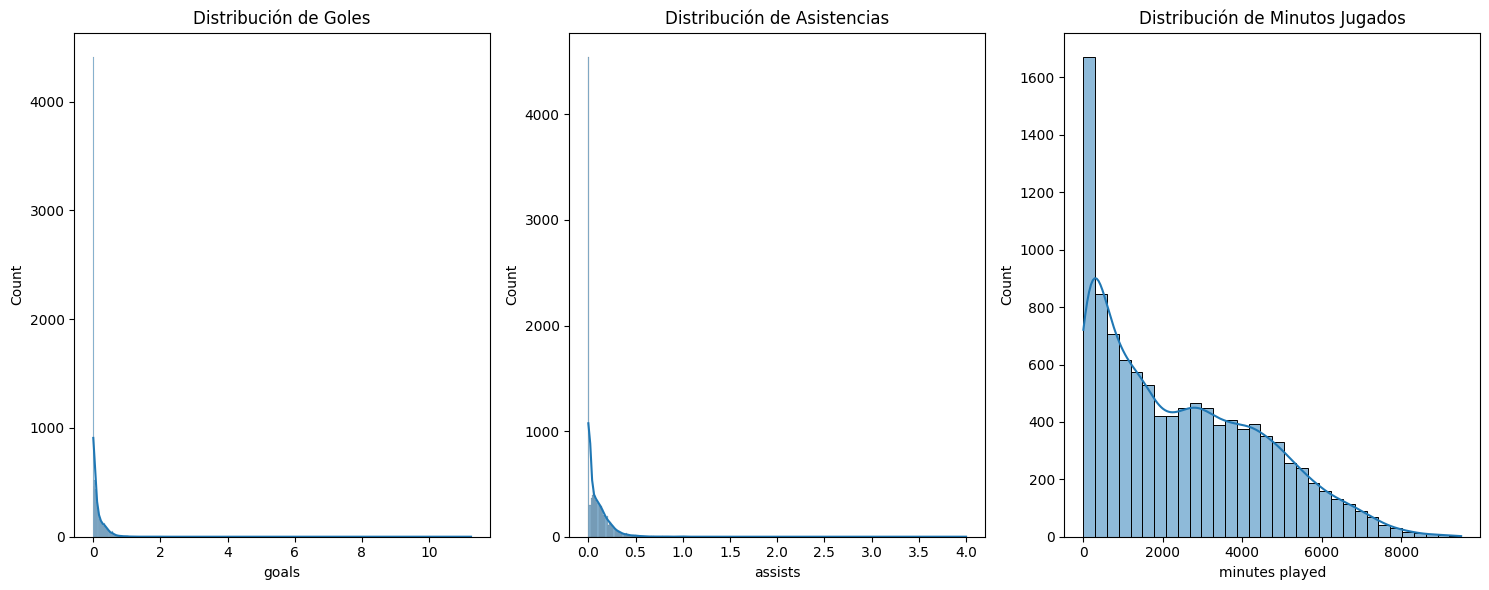

In [16]:
# Distribución de goles, asistencias y minutos jugados
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['goals'], kde=True)
plt.title('Distribución de Goles')

plt.subplot(1, 3, 2)
sns.histplot(data['assists'], kde=True)
plt.title('Distribución de Asistencias')

plt.subplot(1, 3, 3)
sns.histplot(data['minutes played'], kde=True)
plt.title('Distribución de Minutos Jugados')

plt.tight_layout()
plt.show()

In [19]:
# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

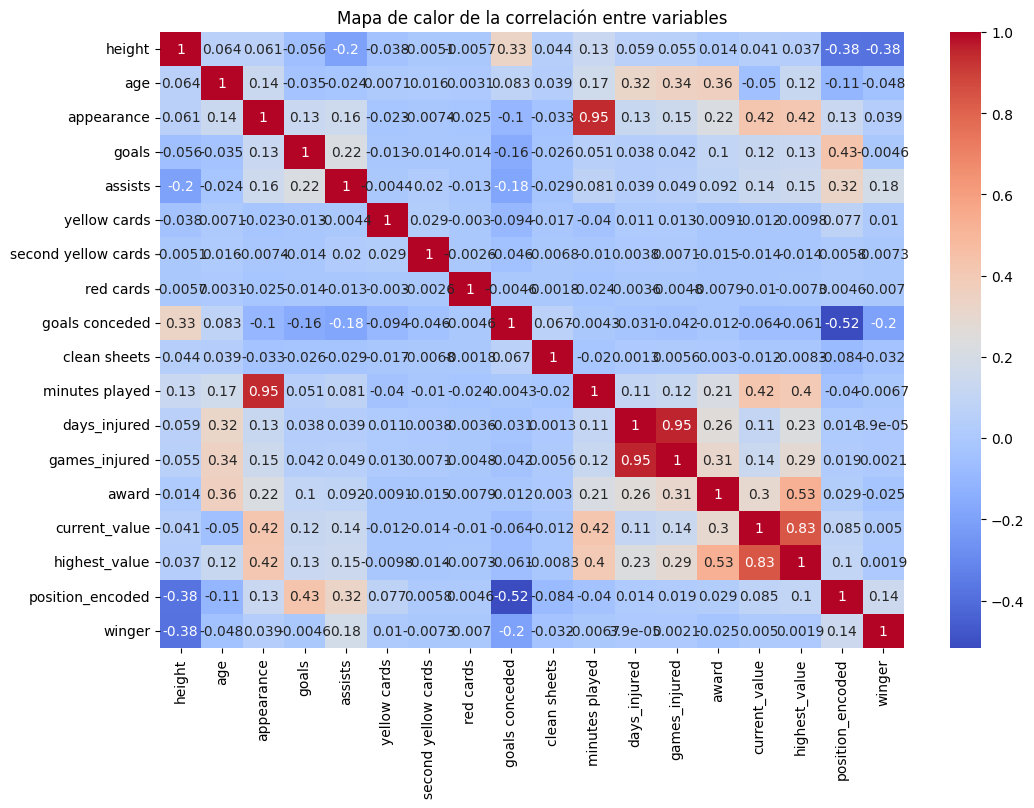

In [20]:
# Correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

# Ingeniería de Atributos, Tratamiento de Outliers y Valores Perdidos
**Uso de StandardScaler:**

El uso de StandardScaler se aplica a las variables numéricas para estandarizarlas, lo cual puede mejorar el rendimiento de algunos modelos que son sensibles a las escalas de las variables (como SVM y KNN). Sin embargo, para Random Forest, esto no es estrictamente necesario, pero puede ser útil si se planea utilizar múltiples modelos.

**Tratamiento de Outliers y Valores Perdidos:**

Vamos a realizar un análisis de outliers y valores perdidos:

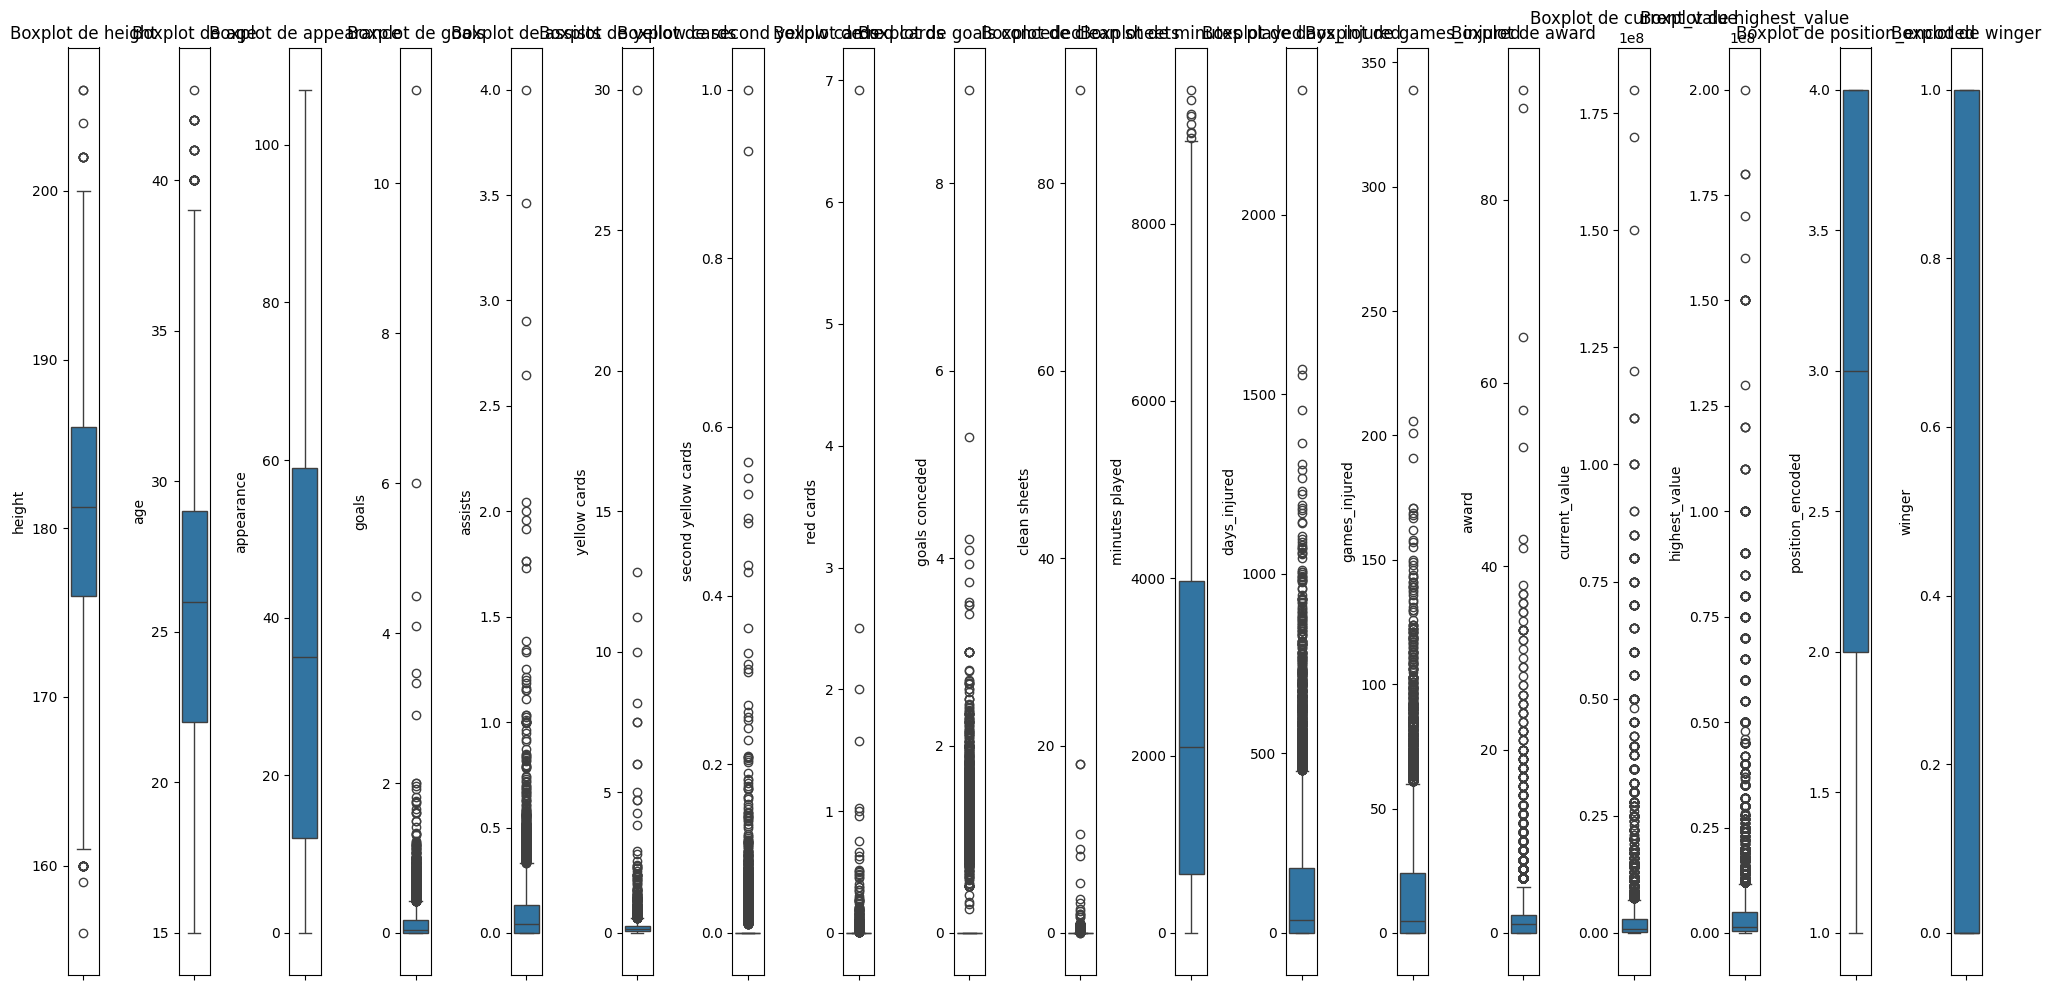

In [23]:
# Identificación de outliers usando boxplot
plt.figure(figsize=(20, 10))
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Entrenamiento y Testeo del modelo
Para el valor de mercado actual, usaremos la variable current_value como objetivo. Para el rendimiento futuro

In [34]:
# Seleccionamos las características y la variable objetivo
features = data.drop(columns=['player', 'name', 'current_value'])
target = data['current_value']

In [35]:
# Identificamos las variables categóricas y numéricas
categorical_features = ['team', 'position']
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in categorical_features]

In [36]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
# Preprocesamiento: codificación de variables categóricas y normalización de variables numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [38]:
# Crear el pipeline con el preprocesador y el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [39]:
# Entrenamiento del modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['height', 'age',
                                                   'appearance', 'goals',
                                                   'assists', 'yellow cards',
                                                   'second yellow cards',
                                                   'red cards',
                                                   'goals conceded',
                                                   'clean sheets',
                                                   'minutes played',
                                                   'days_injured',
                                                   'games_injured', 'award',
                                                   'highest_value',
                                                   'position_encoded',
                                                   'winger']),
                                                 ('cat', OneHotEncoder(),
                                                  ['team', 'position'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [40]:
# se realizan las predicciones
y_pred = model.predict(X_test)

In [42]:
# Se evalua el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse} (en unidades de valor del mercado)')
# El RMSE mide el error promedio entre los valores predichos y los valores reales en las mismas unidades
# que la variable objetivo (en este caso, el valor de mercado en euros, dólares, etc.).

RMSE: 2824471.524890332 (en unidades de valor del mercado)


In [43]:
# Para predecir el rendimiento futuro
targets = ['goals', 'assists', 'minutes played']
predictions = {}

for target in targets:
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    predictions[target] = rmse
    print(f'RMSE for {target}: {rmse}')

RMSE for goals: 0.026906835182623323
RMSE for assists: 0.0028695290190454666
RMSE for minutes played: 4.732789437782915


# Conclusiones
En este proyecto de ciencia de datos, hemos desarrollado y evaluado modelos predictivos para estimar el valor actual de mercado de jugadores de fútbol y predecir su rendimiento futuro en términos de goles, asistencias y minutos jugados. A continuación se presentan las conclusiones clave de nuestro análisis:

  **1.-Modelos Predictivos para el Valor de Mercado:**

  - Utilizando un modelo de regresión Random Forest, logramos predecir el valor de mercado actual de los jugadores con un RMSE de aproximadamente 2,824,471.

  - **Optimización de Inversiones:**
     La predicción del valor y rendimiento futuro de los jugadores permite decisiones informadas en transferencias y contratos, maximizando el retorno de inversión.
  - **Mejora en la Toma de Decisiones:**
     Identificar talentos emergentes y jugadores subvalorados proporciona una ventaja competitiva al adquirir jugadores antes de que su valor aumente.
  - **Desarrollo Estratégico de Talento:**
     Planificar el desarrollo de jugadores jóvenes con base en predicciones de rendimiento futuro maximiza su potencial.


  - La precisión del modelo puede ser mejorada mediante la optimización de hiperparámetros, la incorporación de características adicionales o el uso de técnicas avanzadas de modelado.

**2.-Predicción del Rendimiento Futuro:**

  - También desarrollamos modelos para predecir el rendimiento futuro de los jugadores, específicamente sus goles, asistencias y minutos jugados.

  - Los resultados preliminares muestran que estos modelos tienen un RMSE relativamente bajo, lo que indica una capacidad razonable para prever el rendimiento futuro de los jugadores.

  - La reducción de los datos y el ajuste de los hiperparámetros del modelo son necesarios para mejorar la precisión de estas predicciones.

**3.-Importancia de las Características:**

- Nuestro análisis sugiere que variables como las apariciones, goles, asistencias, y la posición del jugador tienen una influencia significativa en el valor de mercado y el rendimiento futuro.

  - **Goles:**
     Los goles son una métrica directa del desempeño ofensivo de un jugador. Los jugadores que anotan goles consistentemente son más valorados en el mercado debido a su impacto en los resultados de los partidos y en el éxito del equipo.
  - **Asistencias:**
     Las asistencias reflejan la habilidad de un jugador para crear oportunidades de gol, demostrando visión y trabajo en equipo. Las asistencias son fundamentales para el juego de equipo y muy valorados en el mercado.


- La codificación adecuada de variables categóricas y la normalización de variables numéricas son cruciales para el rendimiento del modelo.

**4.-Impacto del Análisis de Datos en el Rendimiento del Equipo:**
   - **Estrategias de Juego:**
     Conocer las capacidades y valor de los jugadores permite diseñar estrategias de juego más efectivas.
   - **Alineaciones Optimizadas:**
     Seleccionar alineaciones basadas en análisis de datos mejora las probabilidades de éxito del equipo.

**5.-Aplicabilidad Comercial:**

  - Para el Futbol Club Excelencia, los modelos desarrollados pueden ser una herramienta valiosa para la toma de decisiones estratégicas en la adquisición y desarrollo de jugadores.

  - Con un sistema predictivo robusto, el club puede optimizar sus inversiones, enfocándose en jugadores con alto potencial de rendimiento y valorización en el mercado.

**6.-Futuras Direcciones:**

  - La inclusión de datos adicionales como el historial de lesiones, rendimiento en entrenamientos, y factores externos (ej. transferencias de otros clubes) podría mejorar significativamente los modelos.

  - La exploración de técnicas de modelado más avanzadas como redes neuronales profundas y el aprendizaje automático basado en ensamblaje podría proporcionar mejoras adicionales en la precisión predictiva.


